Use "Geolonia 住所データ".  
https://geolonia.github.io/japanese-addresses/

In [1]:
import requests

In [2]:
geo_data_url = "https://raw.githubusercontent.com/geolonia/japanese-addresses/master/data/latest.csv"

In [3]:
res = requests.get(geo_data_url)
res

<Response [200]>

In [4]:
res.headers

{'Connection': 'keep-alive', 'Content-Length': '4021391', 'Content-Type': 'text/plain; charset=utf-8', 'Cache-Control': 'max-age=300', 'Content-Security-Policy': "default-src 'none'; style-src 'unsafe-inline'; sandbox", 'ETag': 'W/"e64f1c723af823a4a0e85bb0197f9386c0d1806e2b480a7406d4621b4a5f7a49"', 'Strict-Transport-Security': 'max-age=31536000', 'X-Content-Type-Options': 'nosniff', 'X-Frame-Options': 'deny', 'X-XSS-Protection': '1; mode=block', 'Via': '1.1 varnish (Varnish/6.0), 1.1 varnish', 'Content-Encoding': 'gzip', 'X-GitHub-Request-Id': '284E:253B:21D5CE:24BC61:5F54DECA', 'Accept-Ranges': 'bytes', 'Date': 'Sun, 06 Sep 2020 13:06:21 GMT', 'X-Served-By': 'cache-tyo19940-TYO', 'X-Cache': 'MISS, MISS', 'X-Cache-Hits': '0, 0', 'X-Timer': 'S1599397579.038228,VS0,VE2013', 'Vary': 'Authorization,Accept-Encoding, Accept-Encoding', 'Access-Control-Allow-Origin': '*', 'X-Fastly-Request-ID': 'a8cbfde4e44ffcd7377c49ed890da25b044383ef', 'Expires': 'Sun, 06 Sep 2020 13:11:21 GMT', 'Source-Age'

In [5]:
res.status_code, res.encoding

(200, 'utf-8')

In [6]:
len(res.content)

32538015

In [7]:
with open('address.csv', mode='w') as f:
    f.write(res.text)

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('address.csv', dtype='str')
df['緯度'] = df['緯度'].astype('float64')
df['経度'] = df['経度'].astype('float64')
df

,都道府県コード,都道府県名,都道府県名カナ,都道府県名ローマ字,市区町村コード,市区町村名,市区町村名カナ,市区町村名ローマ字,大字町丁目コード,大字町丁目名,緯度,経度
0,01,北海道,ホッカイドウ,HOKKAIDO,01101,札幌市中央区,サッポロシチュウオウク,SAPPORO SHI CHUO KU,011010001001,旭ケ丘一丁目,43.042230,141.319722
1,01,北海道,ホッカイドウ,HOKKAIDO,01101,札幌市中央区,サッポロシチュウオウク,SAPPORO SHI CHUO KU,011010001002,旭ケ丘二丁目,43.039768,141.321733
2,01,北海道,ホッカイドウ,HOKKAIDO,01101,札幌市中央区,サッポロシチュウオウク,SAPPORO SHI CHUO KU,011010001003,旭ケ丘三丁目,43.039569,141.319617
3,01,北海道,ホッカイドウ,HOKKAIDO,01101,札幌市中央区,サッポロシチュウオウク,SAPPORO SHI CHUO KU,011010001004,旭ケ丘四丁目,43.038819,141.323040
4,01,北海道,ホッカイドウ,HOKKAIDO,01101,札幌市中央区,サッポロシチュウオウク,SAPPORO SHI CHUO KU,011010001005,旭ケ丘五丁目,43.036547,141.322217
...,...,...,...,...,...,...,...,...,...,...,...,...
189534,47,沖縄県,オキナワケン,OKINAWA KEN,47381,八重山郡竹富町,ヤエヤマグンタケトミチョウ,YAEYAMA GUN TAKETOMI CHO,473810010000,字新城,24.234027,123.944947
189535,47,沖縄県,オキナワケン,OKINAWA KEN,47381,八重山郡竹富町,ヤエヤマグンタケトミチョウ,YAEYAMA GUN TAKETOMI CHO,473810011000,字崎山,24.305231,123.685666
189536,47,沖縄県,オキナワケン,OKINAWA KEN,47381,八重山郡竹富町,ヤエヤマグンタケトミチョウ,YAEYAMA GUN TAKETOMI CHO,473810012000,字鳩間,24.472254,123.820428
189537,47,沖縄県,オキナワケン,OKINAWA KEN,47381,八重山郡竹富町,ヤエヤマグンタケトミチョウ,YAEYAMA GUN TAKETOMI CHO,473810013000,字竹富,24.326125,124.089079


In [10]:
df.columns

Index(['都道府県コード', '都道府県名', '都道府県名カナ', '都道府県名ローマ字', '市区町村コード', '市区町村名',
       '市区町村名カナ', '市区町村名ローマ字', '大字町丁目コード', '大字町丁目名', '緯度', '経度'],
      dtype='object')

In [11]:
for c in df.columns:
    print(f'{c}: ', end='')
    print(max([len(str(s)) for s in df[c]]))

都道府県コード: 2
都道府県名: 4
都道府県名カナ: 6
都道府県名ローマ字: 13
市区町村コード: 5
市区町村名: 10
市区町村名カナ: 19
市区町村名ローマ字: 35
大字町丁目コード: 12
大字町丁目名: 15
緯度: 9
経度: 10


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189539 entries, 0 to 189538
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   都道府県コード    189539 non-null  object 
 1   都道府県名      189539 non-null  object 
 2   都道府県名カナ    189539 non-null  object 
 3   都道府県名ローマ字  189539 non-null  object 
 4   市区町村コード    189539 non-null  object 
 5   市区町村名      189539 non-null  object 
 6   市区町村名カナ    189539 non-null  object 
 7   市区町村名ローマ字  189539 non-null  object 
 8   大字町丁目コード   189539 non-null  object 
 9   大字町丁目名     189539 non-null  object 
 10  緯度         189539 non-null  float64
 11  経度         189539 non-null  float64
dtypes: float64(2), object(10)
memory usage: 17.4+ MB


In [13]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

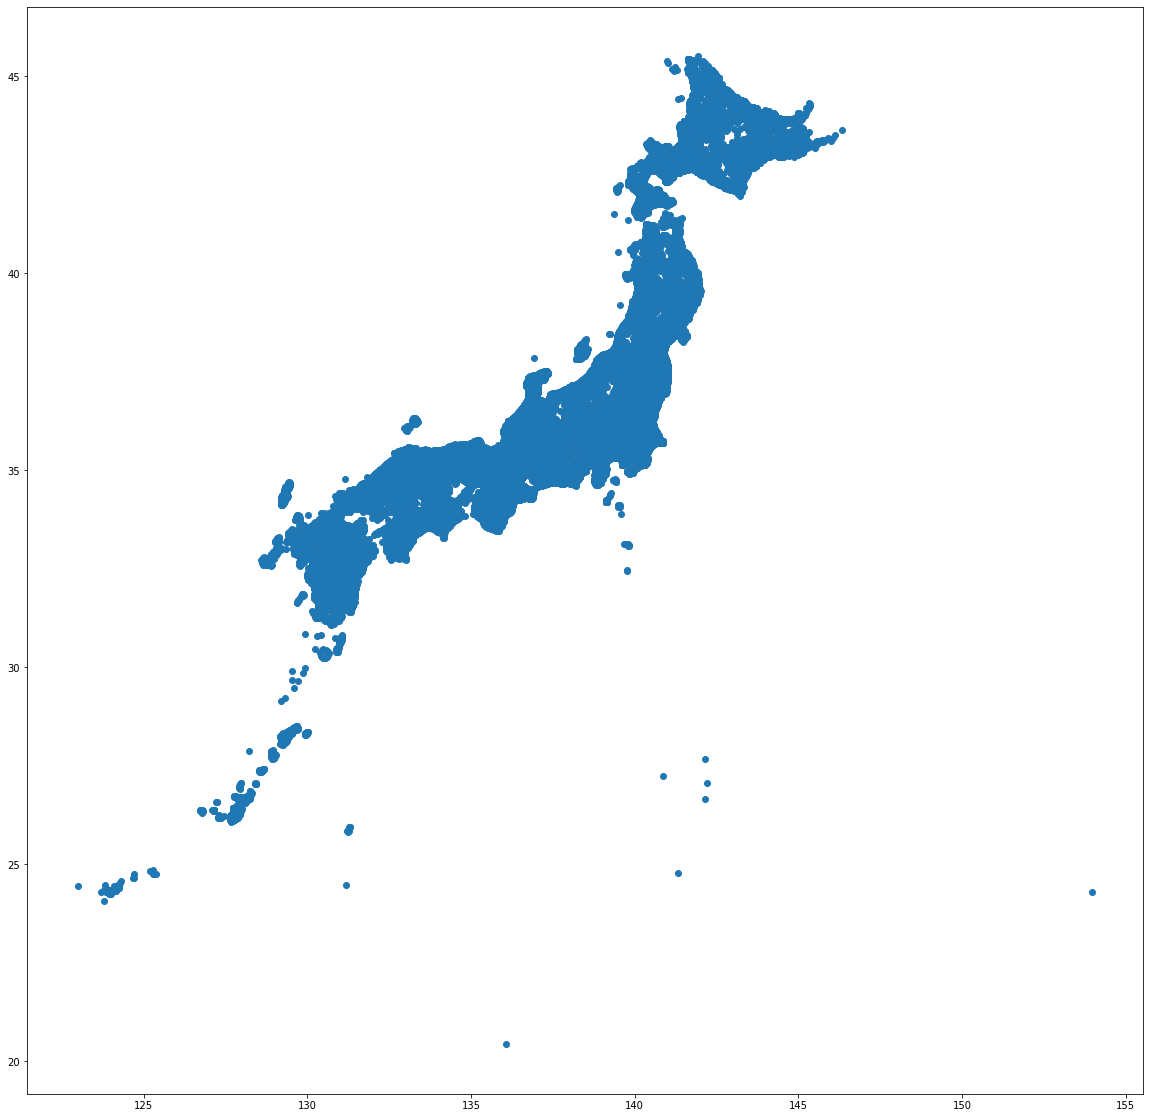

In [22]:
plt.figure(figsize=(20, 20))
plt.scatter(x=df['経度'], y=df['緯度'])

In [18]:
df[df['緯度'] == df['緯度'].max()]

,都道府県コード,都道府県名,都道府県名カナ,都道府県名ローマ字,市区町村コード,市区町村名,市区町村名カナ,市区町村名ローマ字,大字町丁目コード,大字町丁目名,緯度,経度
12997,01,北海道,ホッカイドウ,HOKKAIDO,01214,稚内市,ワッカナイシ,WAKKANAI SHI,012140016000,宗谷岬,45.512988,141.945088


In [19]:
df[df['緯度'] == df['緯度'].min()]

,都道府県コード,都道府県名,都道府県名カナ,都道府県名ローマ字,市区町村コード,市区町村名,市区町村名カナ,市区町村名ローマ字,大字町丁目コード,大字町丁目名,緯度,経度
68948,13,東京都,トウキョウト,TOKYO TO,13421,小笠原村,オガサワラムラ,OGASAWARA MURA,134210002000,沖ノ鳥島,20.425604,136.081143


In [20]:
df[df['経度'] == df['経度'].max()]

,都道府県コード,都道府県名,都道府県名カナ,都道府県名ローマ字,市区町村コード,市区町村名,市区町村名カナ,市区町村名ローマ字,大字町丁目コード,大字町丁目名,緯度,経度
68952,13,東京都,トウキョウト,TOKYO TO,13421,小笠原村,オガサワラムラ,OGASAWARA MURA,134210006000,南鳥島,24.28917,153.980589


In [21]:
df[df['経度'] == df['経度'].min()]

,都道府県コード,都道府県名,都道府県名カナ,都道府県名ローマ字,市区町村コード,市区町村名,市区町村名カナ,市区町村名ローマ字,大字町丁目コード,大字町丁目名,緯度,経度
189538,47,沖縄県,オキナワケン,OKINAWA KEN,47382,八重山郡与那国町,ヤエヤマグンヨナグニチョウ,YAEYAMA GUN YONAGUNI CHO,473820001000,字与那国,24.455925,122.987678


### 都道府県

In [23]:
df_pref = df[['都道府県コード', '都道府県名', '都道府県名カナ', '都道府県名ローマ字']]
df_pref = df_pref.drop_duplicates().reset_index(drop=True)
print(len(df_pref))
df_pref.head()

47


,都道府県コード,都道府県名,都道府県名カナ,都道府県名ローマ字
0,01,北海道,ホッカイドウ,HOKKAIDO
1,02,青森県,アオモリケン,AOMORI KEN
2,03,岩手県,イワテケン,IWATE KEN
3,04,宮城県,ミヤギケン,MIYAGI KEN
4,05,秋田県,アキタケン,AKITA KEN


### 市区町村

In [24]:
df_city = df[[
    '都道府県コード', '市区町村コード', '市区町村名', '市区町村名カナ', '市区町村名ローマ字'
]]
df_city = df_city.drop_duplicates().reset_index(drop=True)
print(len(df_city))
df_city.head()

1893


,都道府県コード,市区町村コード,市区町村名,市区町村名カナ,市区町村名ローマ字
0,01,01101,札幌市中央区,サッポロシチュウオウク,SAPPORO SHI CHUO KU
1,01,01102,札幌市北区,サッポロシキタク,SAPPORO SHI KITA KU
2,01,01103,札幌市東区,サッポロシヒガシク,SAPPORO SHI HIGASHI KU
3,01,01104,札幌市白石区,サッポロシシロイシク,SAPPORO SHI SHIROISHI KU
4,01,01105,札幌市豊平区,サッポロシトヨヒラク,SAPPORO SHI TOYOHIRA KU


### 大字町丁目

In [25]:
df_street = df[[
    '都道府県コード', '市区町村コード', '大字町丁目コード', '大字町丁目名', '緯度', '経度'
]]
df_street = df_street.drop_duplicates().reset_index(drop=True)
print(len(df_street))
df_street.head()

189539


,都道府県コード,市区町村コード,大字町丁目コード,大字町丁目名,緯度,経度
0,01,01101,011010001001,旭ケ丘一丁目,43.042230,141.319722
1,01,01101,011010001002,旭ケ丘二丁目,43.039768,141.321733
2,01,01101,011010001003,旭ケ丘三丁目,43.039569,141.319617
3,01,01101,011010001004,旭ケ丘四丁目,43.038819,141.323040
4,01,01101,011010001005,旭ケ丘五丁目,43.036547,141.322217


In [26]:
_df = df_street.copy()

In [27]:
_pref_groupby = _df.groupby('都道府県コード')
_city_groupby = _df.groupby(['都道府県コード', '市区町村コード'])

In [28]:
_df_pref = df_pref.copy()
_df_pref = pd.concat([
    _df_pref,
    pd.DataFrame(_pref_groupby.max('緯度').reset_index()[['緯度', '経度']]).rename(columns={'緯度': 'north_lat', '経度': 'north_lon'}),
    pd.DataFrame(_pref_groupby.min('緯度').reset_index()[['緯度', '経度']]).rename(columns={'緯度': 'south_lat', '経度': 'south_lon'}),
    pd.DataFrame(_pref_groupby.max('経度').reset_index()[['緯度', '経度']]).rename(columns={'緯度': 'east_lat', '経度': 'east_lon'}),
    pd.DataFrame(_pref_groupby.min('経度').reset_index()[['緯度', '経度']]).rename(columns={'緯度': 'west_lat', '経度': 'west_lon'})
], axis=1)
_df_pref.head()

,都道府県コード,都道府県名,都道府県名カナ,都道府県名ローマ字,north_lat,north_lon,south_lat,south_lon,east_lat,east_lon,west_lat,west_lon
0,01,北海道,ホッカイドウ,HOKKAIDO,45.512988,146.325012,41.358899,139.360479,45.512988,146.325012,41.358899,139.360479
1,02,青森県,アオモリケン,AOMORI KEN,41.527021,141.649675,40.263458,139.497704,41.527021,141.649675,40.263458,139.497704
2,03,岩手県,イワテケン,IWATE KEN,40.389840,142.014260,38.776440,140.719989,40.389840,142.014260,38.776440,140.719989
3,04,宮城県,ミヤギケン,MIYAGI KEN,38.988623,141.670214,37.826695,140.286229,38.988623,141.670214,37.826695,140.286229
4,05,秋田県,アキタケン,AKITA KEN,40.458566,140.889827,38.951731,139.704017,40.458566,140.889827,38.951731,139.704017


In [29]:
_df_city = df_city.copy()
_df_city = pd.concat([
    _df_city,
    pd.DataFrame(_city_groupby.max('緯度').reset_index()[['緯度', '経度']]).rename(columns={'緯度': 'north_lat', '経度': 'north_lon'}),
    pd.DataFrame(_city_groupby.min('緯度').reset_index()[['緯度', '経度']]).rename(columns={'緯度': 'south_lat', '経度': 'south_lon'}),
    pd.DataFrame(_city_groupby.max('経度').reset_index()[['緯度', '経度']]).rename(columns={'緯度': 'east_lat', '経度': 'east_lon'}),
    pd.DataFrame(_city_groupby.min('経度').reset_index()[['緯度', '経度']]).rename(columns={'緯度': 'west_lat', '経度': 'west_lon'})
], axis=1)
_df_city.head()

,都道府県コード,市区町村コード,市区町村名,市区町村名カナ,市区町村名ローマ字,north_lat,north_lon,south_lat,south_lon,east_lat,east_lon,west_lat,west_lon
0,01,01101,札幌市中央区,サッポロシチュウオウク,SAPPORO SHI CHUO KU,43.085343,141.387994,43.018403,141.268641,43.085343,141.387994,43.018403,141.268641
1,01,01102,札幌市北区,サッポロシキタク,SAPPORO SHI KITA KU,43.170361,141.426023,43.067345,141.268303,43.170361,141.426023,43.067345,141.268303
2,01,01103,札幌市東区,サッポロシヒガシク,SAPPORO SHI HIGASHI KU,43.139051,141.451072,43.068883,141.344088,43.139051,141.451072,43.068883,141.344088
3,01,01104,札幌市白石区,サッポロシシロイシク,SAPPORO SHI SHIROISHI KU,43.089350,141.454706,43.024476,141.368987,43.089350,141.454706,43.024476,141.368987
4,01,01105,札幌市豊平区,サッポロシトヨヒラク,SAPPORO SHI TOYOHIRA KU,43.056484,141.431975,42.959718,141.354002,43.056484,141.431975,42.959718,141.354002
